In [2]:
#Alex Netzley
#2/18/2024


import os
import numpy as np
import pandas as pd
import openpyxl
from openpyxl import load_workbook
import matplotlib.pyplot as plt

In [3]:
#Loading in the data
data_folder = os.path.join(os.path.dirname(os.getcwd())+'/data/')
#Read in Yelp Data
yelp_data = pd.read_csv(os.path.join(data_folder, 'yelp_Processed.csv'))

In [ ]:
#Preliminary EDA

print(len(yelp_data))

#Extract average number of reviews
print(np.mean(yelp_data['Yelp Num Reviews']))
print(np.mean(yelp_data['Yelp Rating'].astype('Float32')))

In [28]:
#Extracting the primary tag
tags = yelp_data["Tags"].replace('[\[\]\"\' ]', '', regex=True)
p_tags = []
for row in tags:
    p_tags.append(row.split(',')[0])

yelp_data['Primary Tag'] = p_tags

<Axes: ylabel='Primary Tag'>

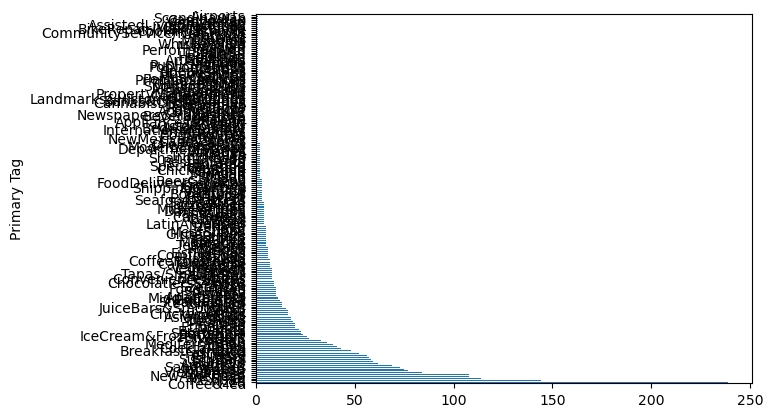

In [34]:
cat_counts = (yelp_data['Primary Tag'].value_counts())
cat_counts.plot(kind = 'barh')

<Axes: ylabel='Primary Tag'>

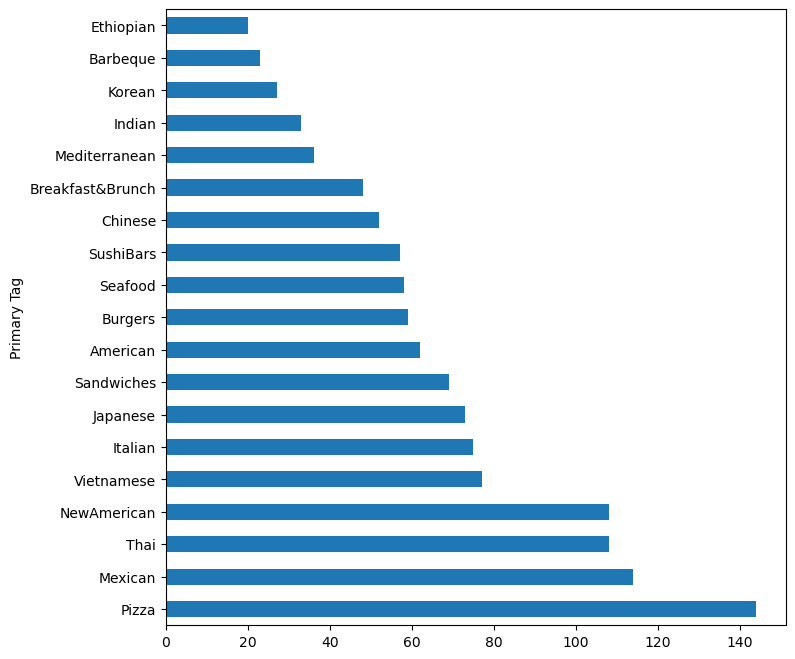

In [43]:
# Filter to Types with at least 20 entries
filt_yelp = yelp_data[yelp_data['Primary Tag'].isin(cat_counts[cat_counts >= 20].index)]

#Excluding all non-food restuarants
exclude_list = ['Bakeries', 'Delis','SportsBars', 'DiveBars', 'IceCream&FrozenYogurt', 'Cafes', 'Pubs', 'CocktailBars', 'FastFood', 'Bars', 'Coffee&Tea']

filt_yelp = filt_yelp[~filt_yelp['Primary Tag'].isin(exclude_list)]

cat_counts = (filt_yelp['Primary Tag'].value_counts())
cat_counts.plot(kind = 'barh', figsize = (8, 8))

#At this point we have 21 cuisines

<Axes: ylabel='Primary Tag'>

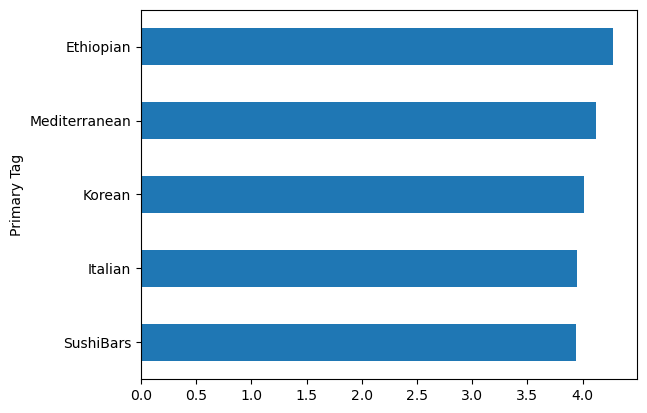

In [46]:
#Plot average rating of these most common cuisines
average_rating = (filt_yelp.groupby('Primary Tag')['Rating'].mean()).sort_values().tail(5)
average_rating.plot(kind='barh')

In [ ]:
yelp_data_seafood = yelp_data[yelp_data['Yelp Tags'].str.contains("New", na=False)]
plt.hist(yelp_data_seafood['Yelp Rating'].astype('Float32'))
plt.title('Histogram of Star Rating for New American Restaurants')
plt.xlabel('Star Rating')